Dataset Shape: (44898, 5)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    donald trump sends embarrassing new year eve m...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes internet joke thr...
3    trump obsessed even obama name coded website i...
4    pope francis called donald trump christmas spe...
Name: clean_text, dtype: object

--- Logistic Regression ---
Accuracy: 0.987750556792873
F1-score: 0.9872003723528043
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


--- SVM ---
Accuracy: 0.994097995545657
F1-score: 0.9938178000699872
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99   

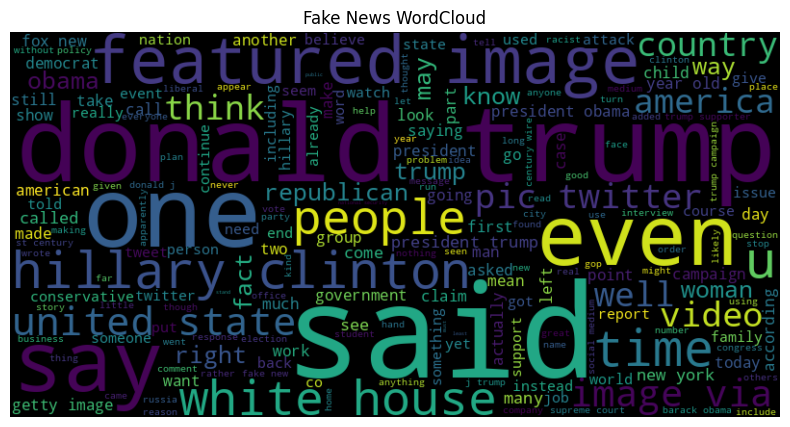

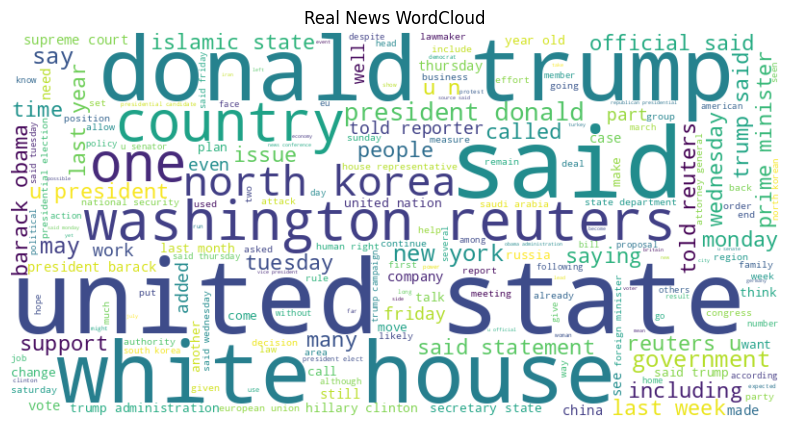

In [3]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
import spacy
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["label"] = 0
true["label"] = 1


data = pd.concat([fake, true], axis=0).reset_index(drop=True)

print("Dataset Shape:", data.shape)
print(data.head())


nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
nlp = spacy.load("en_core_web_sm")

import re
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"[^a-zA-Z]", " ", text)  # keep only letters
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


data["content"] = data["title"] + " " + data["text"]


data["clean_text"] = data["content"].apply(preprocess_text)
print(data["clean_text"].head())

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data["clean_text"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train)

print("\n--- Logistic Regression ---")
y_pred_log = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n--- SVM ---")
y_pred_svm = svm_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

fake_words = " ".join(data[data.label == 0]["clean_text"])
wc_fake = WordCloud(width=800, height=400, background_color="black").generate(fake_words)

plt.figure(figsize=(10,5))
plt.imshow(wc_fake, interpolation="bilinear")
plt.title("Fake News WordCloud")
plt.axis("off")
plt.show()

real_words = " ".join(data[data.label == 1]["clean_text"])
wc_real = WordCloud(width=800, height=400, background_color="white").generate(real_words)

plt.figure(figsize=(10,5))
plt.imshow(wc_real, interpolation="bilinear")
plt.title("Real News WordCloud")
plt.axis("off")
plt.show()
